In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['pima-indians-diabetes-database']


In [2]:
dat=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
dat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
y=dat.Outcome.values
x=dat.drop(["Outcome"],axis=1)

In [4]:
x = (x - np.min(x))/(np.max(x)-np.min(x)).values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [7]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [8]:
def forward_backward_propogation(w,b,x_train,y_train):
    #forward
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    #backward
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [9]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    #updating(learning) parameters is number of iteration times
    for i in range(number_of_iteration):
        #make forward and backward propogation and find cost,gradients
        cost,gradients=forward_backward_propogation(w,b,x_train,y_train)
        cost_list.append(cost)
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteration %i : %f" %(i,cost))
    parameters={"weight":w,"bias":b}        
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,gradients,cost_list

In [10]:
def predict(w,b,x_test):
    #x_test is a input for forward propogation
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_prediction=np.zeros((1,x_test.shape[1]))
    #if z>0.5, our prediction is one
    #if z<0.5, our prediction is zero
    for i in range(z.shape[1]):
        if z[0,i]<=0.5 :
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [11]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,number_of_iteration):
    #initialize
    dimension=x_train.shape[0]
    w,b= initialize_weights_and_bias(dimension)
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,number_of_iteration)
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))

cost after iteration 0 : 0.224948
cost after iteration 10 : -0.042622
cost after iteration 20 : -0.040706
cost after iteration 30 : -0.039526
cost after iteration 40 : -0.038741
cost after iteration 50 : -0.038189
cost after iteration 60 : -0.037788
cost after iteration 70 : -0.037493
cost after iteration 80 : -0.037275
cost after iteration 90 : -0.037117
cost after iteration 100 : -0.037006
cost after iteration 110 : -0.036931
cost after iteration 120 : -0.036885
cost after iteration 130 : -0.036862
cost after iteration 140 : -0.036858
cost after iteration 150 : -0.036869
cost after iteration 160 : -0.036892
cost after iteration 170 : -0.036924
cost after iteration 180 : -0.036964
cost after iteration 190 : -0.037011
cost after iteration 200 : -0.037062
cost after iteration 210 : -0.037117
cost after iteration 220 : -0.037175
cost after iteration 230 : -0.037235
cost after iteration 240 : -0.037297
cost after iteration 250 : -0.037360
cost after iteration 260 : -0.037423
cost after it

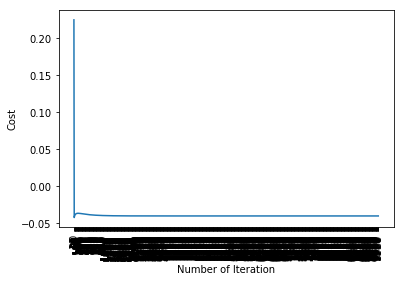

train accuracy: 77.0358306188925 %
test accuracy: 75.32467532467533 %


In [12]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=2,number_of_iteration=10000)